# Куличенко Владимир БПМ172

## Условие 

#### Решаем уравнение вида 

$$
\frac{\partial u (x,t)}{\partial t} = \frac{\partial^2 u(x,t)}{\partial x^2}
$$

#### c краевыми условиями $(0 \leqslant x \leqslant 1)$

$$
u(0, t) = u(1, t) = 0
$$

#### и начальным условием

$$
u(x, 0) = \sin{\pi x} 
$$

## Решение

### Шаг 1
#### Задаем в области (${0 \leq x \leq 1, 0 \leq t \leq 1}$) равномерную сетку с шагом $h$ по координате и шагом $\tau$ по времени. 
#### Также задаем граничные и начальные условия

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_max = 1.0
t_max = 1.0
h = 0.1
tau = 0.0001

#### Реализуем явную конечно-разностную схему на четырхточечном шаблоне

In [3]:
def func(h,tau,x_max,t_max):
    x = np.arange(0,x_max+h, h)
    t = np.arange(0,t_max+tau, tau)
    
    M = len(t)
    N = len(x)
    
    u = np.zeros([M,N])
    
    u[0,:] = np.sin(np.pi * x)
    u[:,0] = 0
    u[:, -1] = 0
    
    d = (tau/h**2)
    
    for i in range(0,M-1):
        for j in range(1,N-1):
            u[i+1,j] = u[i,j] + d*(u[i,j-1] - 2*u[i,j] + u[i,j+1])
        
    return u

In [4]:
u = func(h,tau,x_max,t_max)

In [5]:
u

array([[0.00000000e+00, 3.09016994e-01, 5.87785252e-01, ...,
        5.87785252e-01, 3.09016994e-01, 0.00000000e+00],
       [0.00000000e+00, 3.08714507e-01, 5.87209887e-01, ...,
        5.87209887e-01, 3.08714507e-01, 0.00000000e+00],
       [0.00000000e+00, 3.08412316e-01, 5.86635085e-01, ...,
        5.86635085e-01, 3.08412316e-01, 0.00000000e+00],
       ...,
       [0.00000000e+00, 1.72812043e-05, 3.28708038e-05, ...,
        3.28708038e-05, 1.72812043e-05, 0.00000000e+00],
       [0.00000000e+00, 1.72642882e-05, 3.28386276e-05, ...,
        3.28386276e-05, 1.72642882e-05, 0.00000000e+00],
       [0.00000000e+00, 1.72473887e-05, 3.28064829e-05, ...,
        3.28064829e-05, 1.72473887e-05, 0.00000000e+00]])

#### Получили сетку решений $u_i^j$

### Шаг 2

#### Проверяем устойчивость.
#### Условие устойчивости 
$$
D \frac{\tau}{h^2} \leq \frac{1}{2}
$$

In [90]:
tau/h**2

0.009999999999999998

Выполняется

### Шаг 3

#### Находим точное решение аналитически

#### Точное решение:

$$
u(x,t) = e^{-\pi \cdot t} \cdot sin(\pi x)
$$

#### Получено в вольфраме

#### Строим сетку верных решений

In [91]:
u_func = lambda t,x: np.exp(-np.pi*t)*np.sin(np.pi*x)

def func2(h, tau, func):
  x = np.arange(0,1+h,h)
  t = np.arange(0,1+tau, tau)

  T, X = np.meshgrid(t, x)

  return func(T, X).T

In [92]:
u_true = func2(h,tau,u_func)

### Шаг 4 
#### Сравним графики точного и приближенного решения

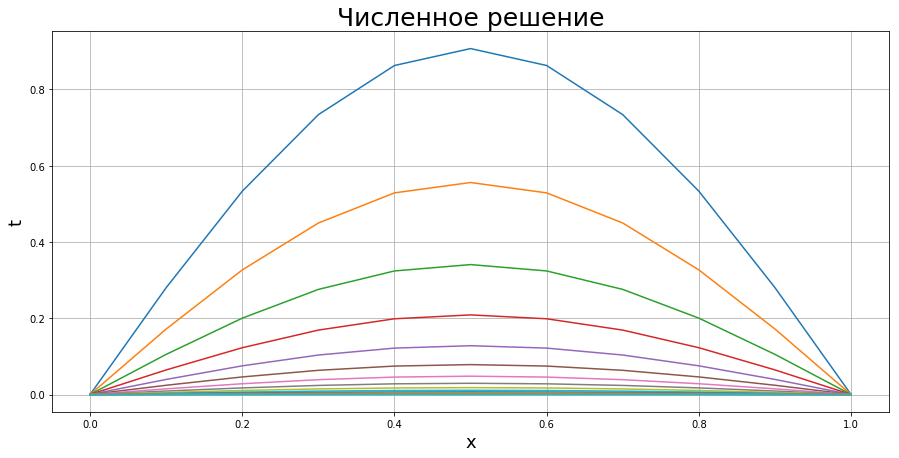

In [93]:
plt.figure(figsize=(15,7)) 
plt.xlabel('x', fontsize=18)
plt.ylabel('t', fontsize=18)
plt.title('Численное решение', fontsize=25)
plt.grid(True)
x_scale = np.arange(0,x_max+h,h) 
plot_times = np.arange(0.01,1.0,0.05)
for t in plot_times:
       
       plt.plot(x_scale,u[int(t/tau),:])

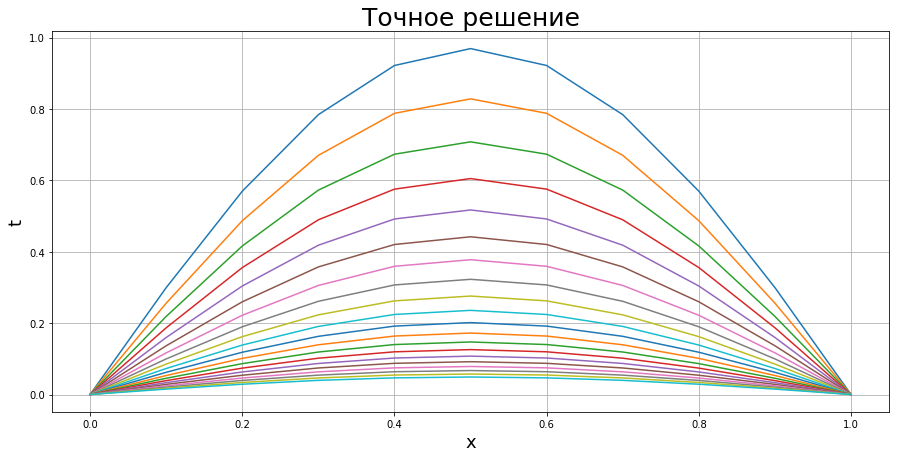

In [94]:
plt.figure(figsize=(15,7)) 
plt.xlabel('x', fontsize=18)
plt.ylabel('t', fontsize=18)
plt.title('Точное решение', fontsize=25)
plt.grid(True)
x_scale = np.arange(0,x_max+h,h) 
plot_times = np.arange(0.01,1.0,0.05)
for t in plot_times:
       
       plt.plot(x_scale,u_true[int(t/tau),:])

#### Посчтитаем ошибку

In [6]:
def err(h, tau, u_true):
    u = func(h,tau,x_max,t_max)
    u_true = func2(h,tau,u_func)
    
    # достаточно взять ошибку на 1 слое, тк t у нас не фиксированная
    # значит можно смотреть любое изменение по времени
    return abs(u[1]-u_true[1]).mean()

In [7]:
err(h,tau)

NameError: name 'u_true' is not defined

### Шаг 5

#### Рассмотрим, когда не выполняется условие устойчивости и когда в нем равенство.

#### 1. Неравенство не выполняется 
$$
D \frac{\tau}{h^2} > \frac{1}{2}
$$

In [102]:
h = 0.01
tau = 0.1

In [103]:
tau/h**2

1000.0

In [104]:
u = func(h,tau,x_max,t_max)

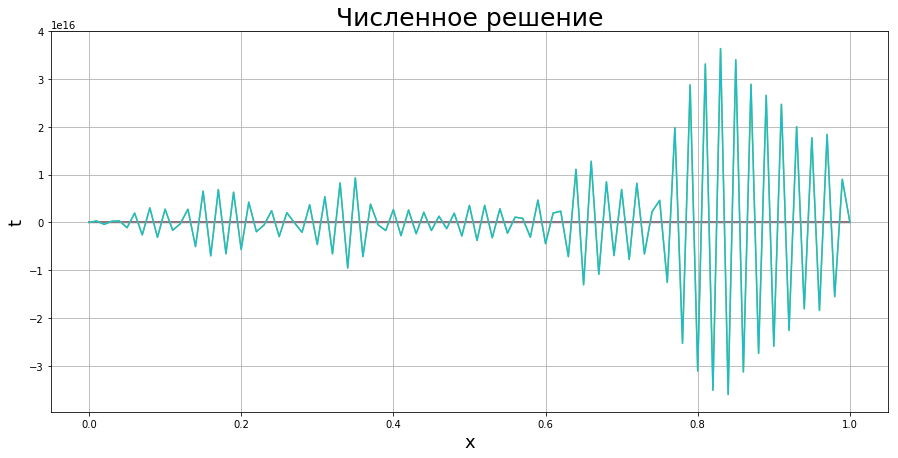

In [105]:
plt.figure(figsize=(15,7)) 
plt.xlabel('x', fontsize=18)
plt.ylabel('t', fontsize=18)
plt.title('Численное решение', fontsize=25)
plt.grid(True)
x_scale = np.arange(0,x_max+h,h) 
plot_times = np.arange(0.01,1.0,0.05)
for t in plot_times:
       
       plt.plot(x_scale,u[int(t/tau),:])

Видим, что функция ведет себя совершенно не так, как должна. t то и дело становится < 0, а такого не может быть. 
Она имеет значения только вокруг нуля - от 3е16 до -3е16, а это неверно.

#### 2. Выполняется равенство 
$$
D \frac{\tau}{h^2} = \frac{1}{2}
$$

In [97]:
h = 0.2
tau = 0.02

In [98]:
tau/h**2

0.4999999999999999

In [99]:
u = func(h,tau,x_max,t_max)

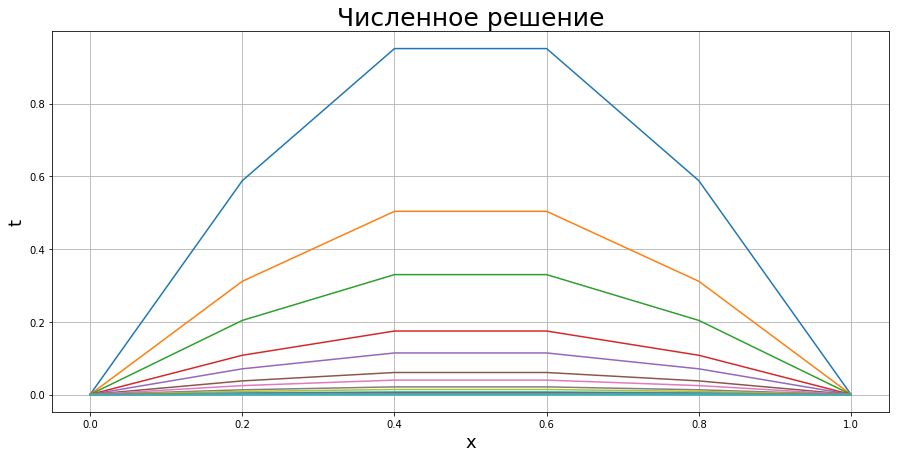

In [100]:
plt.figure(figsize=(15,7)) 
plt.xlabel('x', fontsize=18)
plt.ylabel('t', fontsize=18)
plt.title('Численное решение', fontsize=25)
plt.grid(True)
x_scale = np.arange(0,x_max+h,h) 
plot_times = np.arange(0.01,1.0,0.05)
for t in plot_times:
       
       plt.plot(x_scale,u[int(t/tau),:])

Посмотрим ошибку

In [101]:
err(h,tau)

0.06672642222962233

Как видим, она больше, чем когда неравенство выполнялось

### Шаг 6 


#### Фиксируем h, смотрим на изменение ошибки при $\tau$, $\frac{\tau}{2}$, $\frac{\tau}{4}$

In [113]:
print(err(0.1, 0.0008))
print(err(0.1, 0.0004))
print(err(0.1, 0.0002))

0.009067644338699818
0.004556054295482792
0.002283596184077415


Как видим, при уменьшении в два раза $\tau$, ошибка тоже уменьшается в два раза при фиксированной h

#### Фиксируем $\tau$, смотрим на изменение ошибки при $h$, $\frac{h}{2}$, $\frac{h}{4}$

In [114]:
print(err(0.1, 0.0001))
print(err(0.05, 0.0001))
print(err(0.025, 0.0001))

0.0011431917263279615
0.0012160776568231049
0.0012504901120858258
